In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

In [100]:
0.2*np.sign(0.5-np.random.rand(x.shape[0]))

array([ 0.2, -0.2,  0.2, -0.2, -0.2, -0.2,  0.2, -0.2,  0.2, -0.2, -0.2,
        0.2, -0.2, -0.2,  0.2, -0.2, -0.2, -0.2,  0.2,  0.2,  0.2, -0.2,
       -0.2,  0.2,  0.2,  0.2, -0.2, -0.2,  0.2,  0.2,  0.2,  0.2, -0.2,
       -0.2, -0.2, -0.2, -0.2,  0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
        0.2,  0.2, -0.2, -0.2,  0.2,  0.2, -0.2,  0.2,  0.2,  0.2, -0.2,
        0.2, -0.2,  0.2,  0.2,  0.2, -0.2, -0.2,  0.2,  0.2, -0.2,  0.2,
       -0.2, -0.2,  0.2, -0.2, -0.2,  0.2,  0.2,  0.2, -0.2,  0.2,  0.2,
       -0.2,  0.2, -0.2,  0.2,  0.2,  0.2, -0.2,  0.2, -0.2, -0.2,  0.2,
       -0.2, -0.2,  0.2,  0.2, -0.2, -0.2,  0.2,  0.2, -0.2, -0.2, -0.2,
        0.2])

In [108]:
def curve(x, noise=False):
    rand_sig = np.random.RandomState(1)
    rand_noise = np.random.RandomState(0)
    if noise == False:
        return np.sin(2*x*np.pi)
    else:
        return 0.2*np.sign(0.5-rand_sig.rand(x.shape[0]))*rand_noise.rand(x.shape[0]) + np.sin(2*x*np.pi)

def polynom(x, degree=2):
    poly_trans = PolynomialFeatures(degree=degree)
    return poly_trans.fit_transform(np.array(x).reshape(-1, 1))     

def f(x, W, degree=2):
    poly_coef = polynom(x, degree=degree).T
    return np.dot(W.transpose(), poly_coef), poly_coef

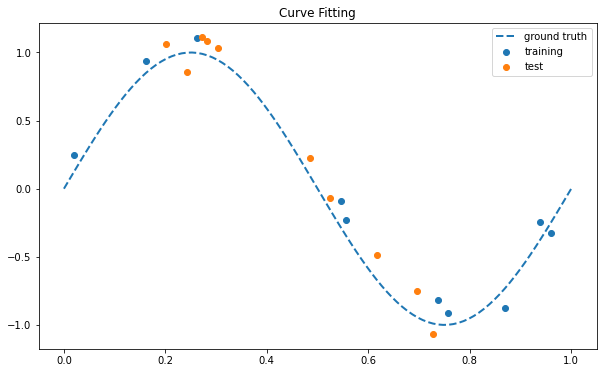

In [148]:
x = np.linspace(0, 1, 100)
y = curve(x)
size_train = 10
rng = np.random.RandomState(0)
'''
x_train = rng.choice(x, size=size_train, replace=False)
y_train = curve(x_train, noise=True)
'''


values_tmp = rng.choice(x, size=80, replace=False)
x_train = values_tmp[0:size_train]
x_test = np.sort(rng.choice(values_tmp[size_train:], size=10, replace=False))
y_train = curve(x_train, noise=True)
y_test = curve(x_test, noise=True)



figsize=[10,6]

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="training")
ax.scatter(x_test, y_test, label="test")
ax.set_title('Curve Fitting')
ax.legend()

In [141]:
degree=8
N = x_train.shape[0]
Y = y_train.reshape(1, -1)

W = np.random.rand(degree + 1, 1)
Y_pred, coeff = f(x_train, W, degree=degree)

X = coeff
N, Y.shape, Y_pred.shape, W.shape, coeff.shape

(10, (1, 10), (1, 10), (9, 1), (9, 10))

In [116]:
## loss function
loss = (1/N)*np.dot(Y-Y_pred, (Y-Y_pred).transpose())
loss

array([[6.3573158]])

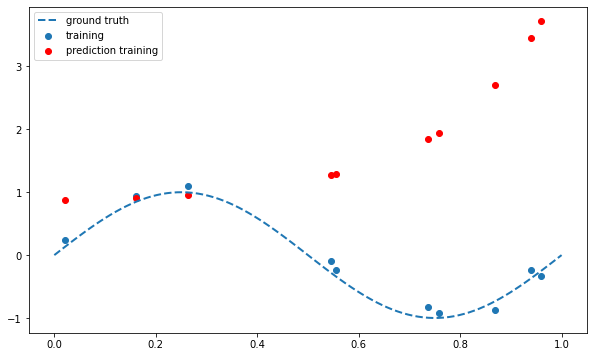

In [142]:
fig, ax = plt.subplots(figsize=figsize)
# ax.set_prop_cycle(
#     color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"]
#     color=[None, "red"]
# )
ax.plot(x, y, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="training")
ax.scatter(x_train, Y_pred, label="prediction training", color='red')
ax.legend()

In [129]:
## derivate
derivate_loss = np.dot(2*(Y-Y_pred), X.transpose())
derivate_loss.shape

(1, 9)

In [130]:
## closed form solution
W_p = np.dot(np.dot(Y, X.transpose()), np.linalg.inv(np.dot(X, X.transpose())))
W_p = W_p.transpose()
W_p.shape

(9, 1)

In [143]:
Y_pred, _ = f(x_train, W_p, degree=degree)
loss = (1/N)*np.dot(Y-Y_pred, (Y-Y_pred).transpose())
loss

array([[0.00013351]])

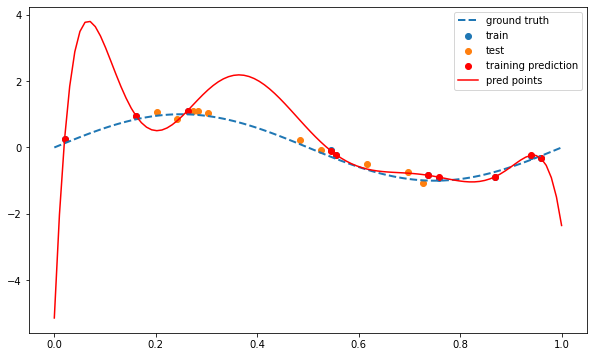

In [144]:
Y_pred_curve, _ = f(x, W_p, degree=degree)

fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, '--', linewidth=2, label="ground truth")
ax.scatter(x_train, y_train, label="train")
ax.scatter(x_test, y_test, label="test")
ax.scatter(x_train, Y_pred, label="training prediction", color='red')
ax.plot(x, Y_pred_curve.reshape(-1),label="pred points", color='red')
ax.legend()